In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv("data.csv")
data.head()

,y_act,y_pred_random_forest,y_pred_logistic
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


In [95]:
y_act = data.y_act
y_rf = data.y_pred_random_forest
y_log = data.y_pred_logistic

In [96]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    data[i]= y_rf.map(lambda x: 1 if x > i else 0)
data.head()

,y_act,y_pred_random_forest,y_pred_logistic,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.639816,0.531904,1,1,1,1,1,1,1,0,0,0
1,0,0.490993,0.414496,1,1,1,1,1,0,0,0,0,0
2,1,0.623815,0.569883,1,1,1,1,1,1,1,0,0,0
3,1,0.506616,0.443674,1,1,1,1,1,1,0,0,0,0
4,0,0.418302,0.369532,1,1,1,1,1,0,0,0,0,0


In [97]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = metrics.confusion_matrix(y_act, data[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500000  1.000000  0.000000
0.2   0.2  0.500254  1.000000  0.000508
0.3   0.3  0.510344  0.998731  0.021957
0.4   0.4  0.592778  0.940602  0.244955
0.5   0.5  0.670517  0.640564  0.700470
0.6   0.6  0.612768  0.284173  0.941363
0.7   0.7  0.529763  0.063333  0.996192
0.8   0.8  0.504696  0.009392  1.000000
0.9   0.9  0.500317  0.000635  1.000000


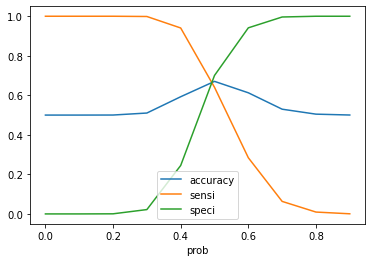

In [98]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [99]:
data['rf_predicted'] = y_rf.map(lambda x: 1 if x > 0.5 else 0)
data.head()

,y_act,y_pred_random_forest,y_pred_logistic,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,rf_predicted
0,1,0.639816,0.531904,1,1,1,1,1,1,1,0,0,0,1
1,0,0.490993,0.414496,1,1,1,1,1,0,0,0,0,0,0
2,1,0.623815,0.569883,1,1,1,1,1,1,1,0,0,0,1
3,1,0.506616,0.443674,1,1,1,1,1,1,0,0,0,0,1
4,0,0.418302,0.369532,1,1,1,1,1,0,0,0,0,0,0


In [100]:
from sklearn import metrics

In [101]:
confusion = metrics.confusion_matrix(y_act,data.rf_predicted)
print(confusion)

[[5519 2360]
 [2832 5047]]


In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
TP

4279

In [85]:
data_log = data[['y_act','y_pred_logistic']]
data_log

,y_act,y_pred_logistic
0,1,0.531904
1,0,0.414496
2,1,0.569883
3,1,0.443674
4,0,0.369532
...,...,...
15753,1,0.534994
15754,0,0.689612
15755,1,0.560755
15756,1,0.744783


In [86]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    data_log[i]= data_log.y_pred_logistic.map(lambda x: 1 if x > i else 0)
data_log.head()

<ipython-input-86-2d2c0f3a7982>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_log[i]= data_log.y_pred_logistic.map(lambda x: 1 if x > i else 0)


,y_act,y_pred_logistic,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.531904,1,1,1,1,1,1,0,0,0,0
1,0,0.414496,1,1,1,1,1,0,0,0,0,0
2,1,0.569883,1,1,1,1,1,1,0,0,0,0
3,1,0.443674,1,1,1,1,1,0,0,0,0,0
4,0,0.369532,1,1,1,1,0,0,0,0,0,0


In [87]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = metrics.confusion_matrix(y_act, data_log[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500825  1.000000  0.001650
0.2   0.2  0.501015  0.999873  0.002158
0.3   0.3  0.519799  0.987562  0.052037
0.4   0.4  0.596332  0.829420  0.363244
0.5   0.5  0.615814  0.543089  0.688539
0.6   0.6  0.587892  0.305369  0.870415
0.7   0.7  0.551974  0.152050  0.951897
0.8   0.8  0.524876  0.062952  0.986800
0.9   0.9  0.509202  0.020688  0.997715


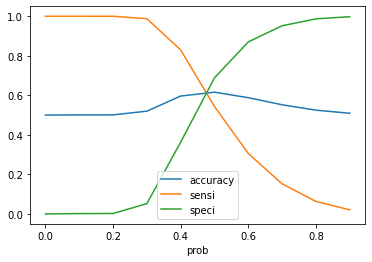

In [88]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [89]:
data_log['log_predicted'] = y_log.map(lambda x: 1 if x > 0.5 else 0)
data_log.head()

<ipython-input-89-b2b25a2bfb86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_log['log_predicted'] = y_log.map(lambda x: 1 if x > 0.5 else 0)


,y_act,y_pred_logistic,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,log_predicted
0,1,0.531904,1,1,1,1,1,1,0,0,0,0,1
1,0,0.414496,1,1,1,1,1,0,0,0,0,0,0
2,1,0.569883,1,1,1,1,1,1,0,0,0,0,1
3,1,0.443674,1,1,1,1,1,0,0,0,0,0,0
4,0,0.369532,1,1,1,1,0,0,0,0,0,0,0


In [90]:
confusion = metrics.confusion_matrix(y_act,data_log.log_predicted)
print(confusion)

[[5425 2454]
 [3600 4279]]
